In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 데이터 불러오기

In [2]:
train = pd.read_csv("data/train.csv")
train = train.drop(['index'], axis=1)  # index 컬럼 삭제 무의미한 데이터

test = pd.read_csv("data/test_x.csv")
test = test.drop(['index'], axis=1)

## 데이터 확인

### train셋 확인

In [3]:
train.head(10)  # 데이터 확인

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,...,0,0,0,0,1,0,0,0,0,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,...,1,1,1,1,1,0,1,0,1,1
7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,...,1,1,1,1,1,1,1,0,1,1
8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,...,0,0,0,0,1,0,0,0,1,1
9,2.0,1668,1.0,866,1.0,895,1.0,1308,2.0,1715,...,1,1,0,1,1,0,1,1,1,1


In [4]:
train.info()  # 데이터 유형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [5]:
train.isna().sum()

QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

In [6]:
test.isna().sum()

QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 76, dtype: int64

## 라벨 인코딩

In [7]:
train_age = pd.Categorical(train['age_group'])
train_gender = pd.Categorical(train['gender'])
train_race = pd.Categorical(train['race'])
train_religion = pd.Categorical(train['religion'])

test_age = pd.Categorical(test['age_group'])
test_gender = pd.Categorical(test['gender'])
test_race = pd.Categorical(test['race'])
test_religion = pd.Categorical(test['religion'])

In [8]:
train['age_group'] = train_age.codes
train['gender'] = train_gender.codes
train['race'] = train_race.codes
train['religion'] = train_religion.codes

test['age_group'] = test_age.codes
test['gender'] = test_gender.codes
test['race'] = test_race.codes
test['religion'] = test_religion.codes

train['age_group']

0        3
1        2
2        3
3        2
4        2
        ..
45527    1
45528    3
45529    1
45530    4
45531    2
Name: age_group, Length: 45532, dtype: int8

In [9]:
train = train.astype('float64')
test = test.astype('float64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  float64
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  float64
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  float64
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  float64
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  float64
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  float64
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  float64
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  float64
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  float64
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

## 데이터 전처리 전 시각화

C:\Users\mhs\AppData\Local\Temp\ipykernel_28356\3915146891.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(), dtype=np.bool)


<AxesSubplot:>

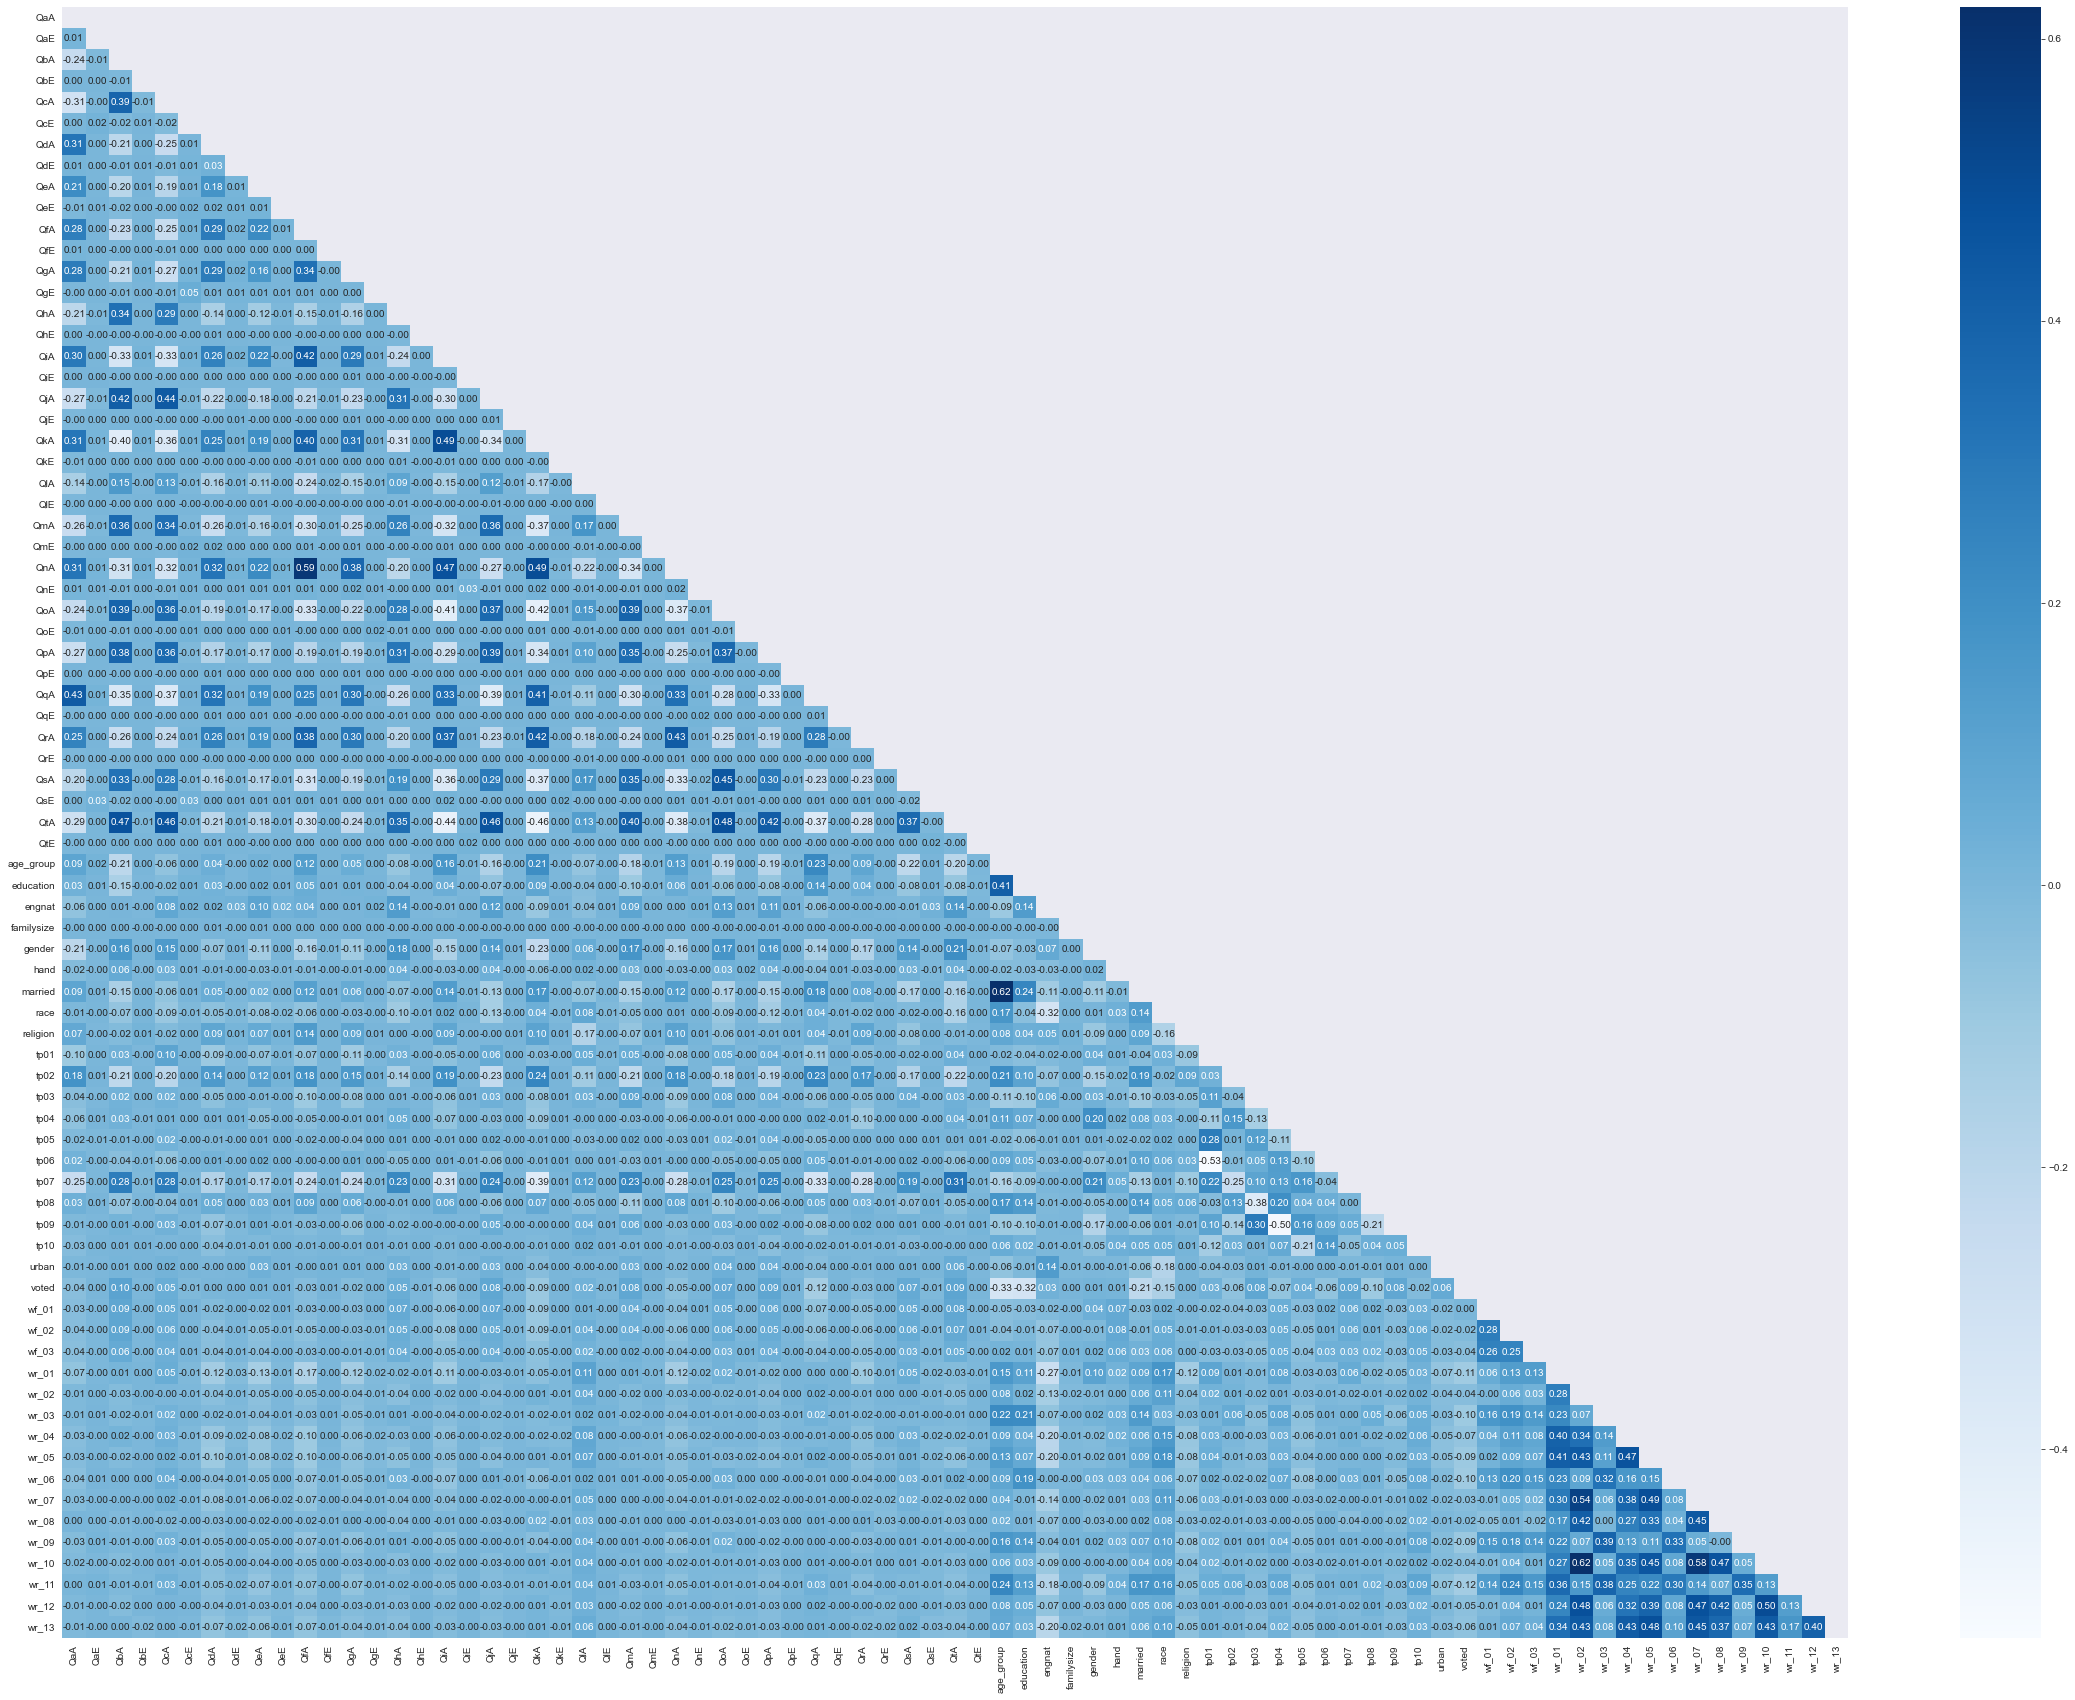

In [10]:
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True, cmap='Blues', fmt='.2f', mask=mask)  #전체의 상관관계 시각화

<AxesSubplot:ylabel='voted'>

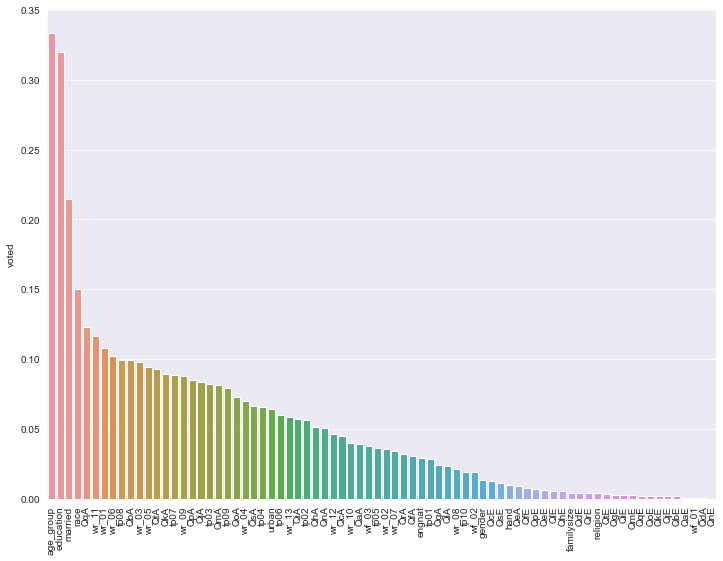

In [11]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
sns.barplot(x=abs(train.corr()['voted']).sort_values(ascending=False)[1:].index,
            y=abs(train.corr()['voted']).sort_values(ascending=False)[1:])

### 상관계수가 낮은 열 삭제

In [12]:
train = train.drop(
    ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
     'QpE', 'QqE', 'QrE', 'QsE', 'QtE'], axis=1)
test = test.drop(
    ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
     'QpE', 'QqE', 'QrE', 'QsE', 'QtE'], axis=1)

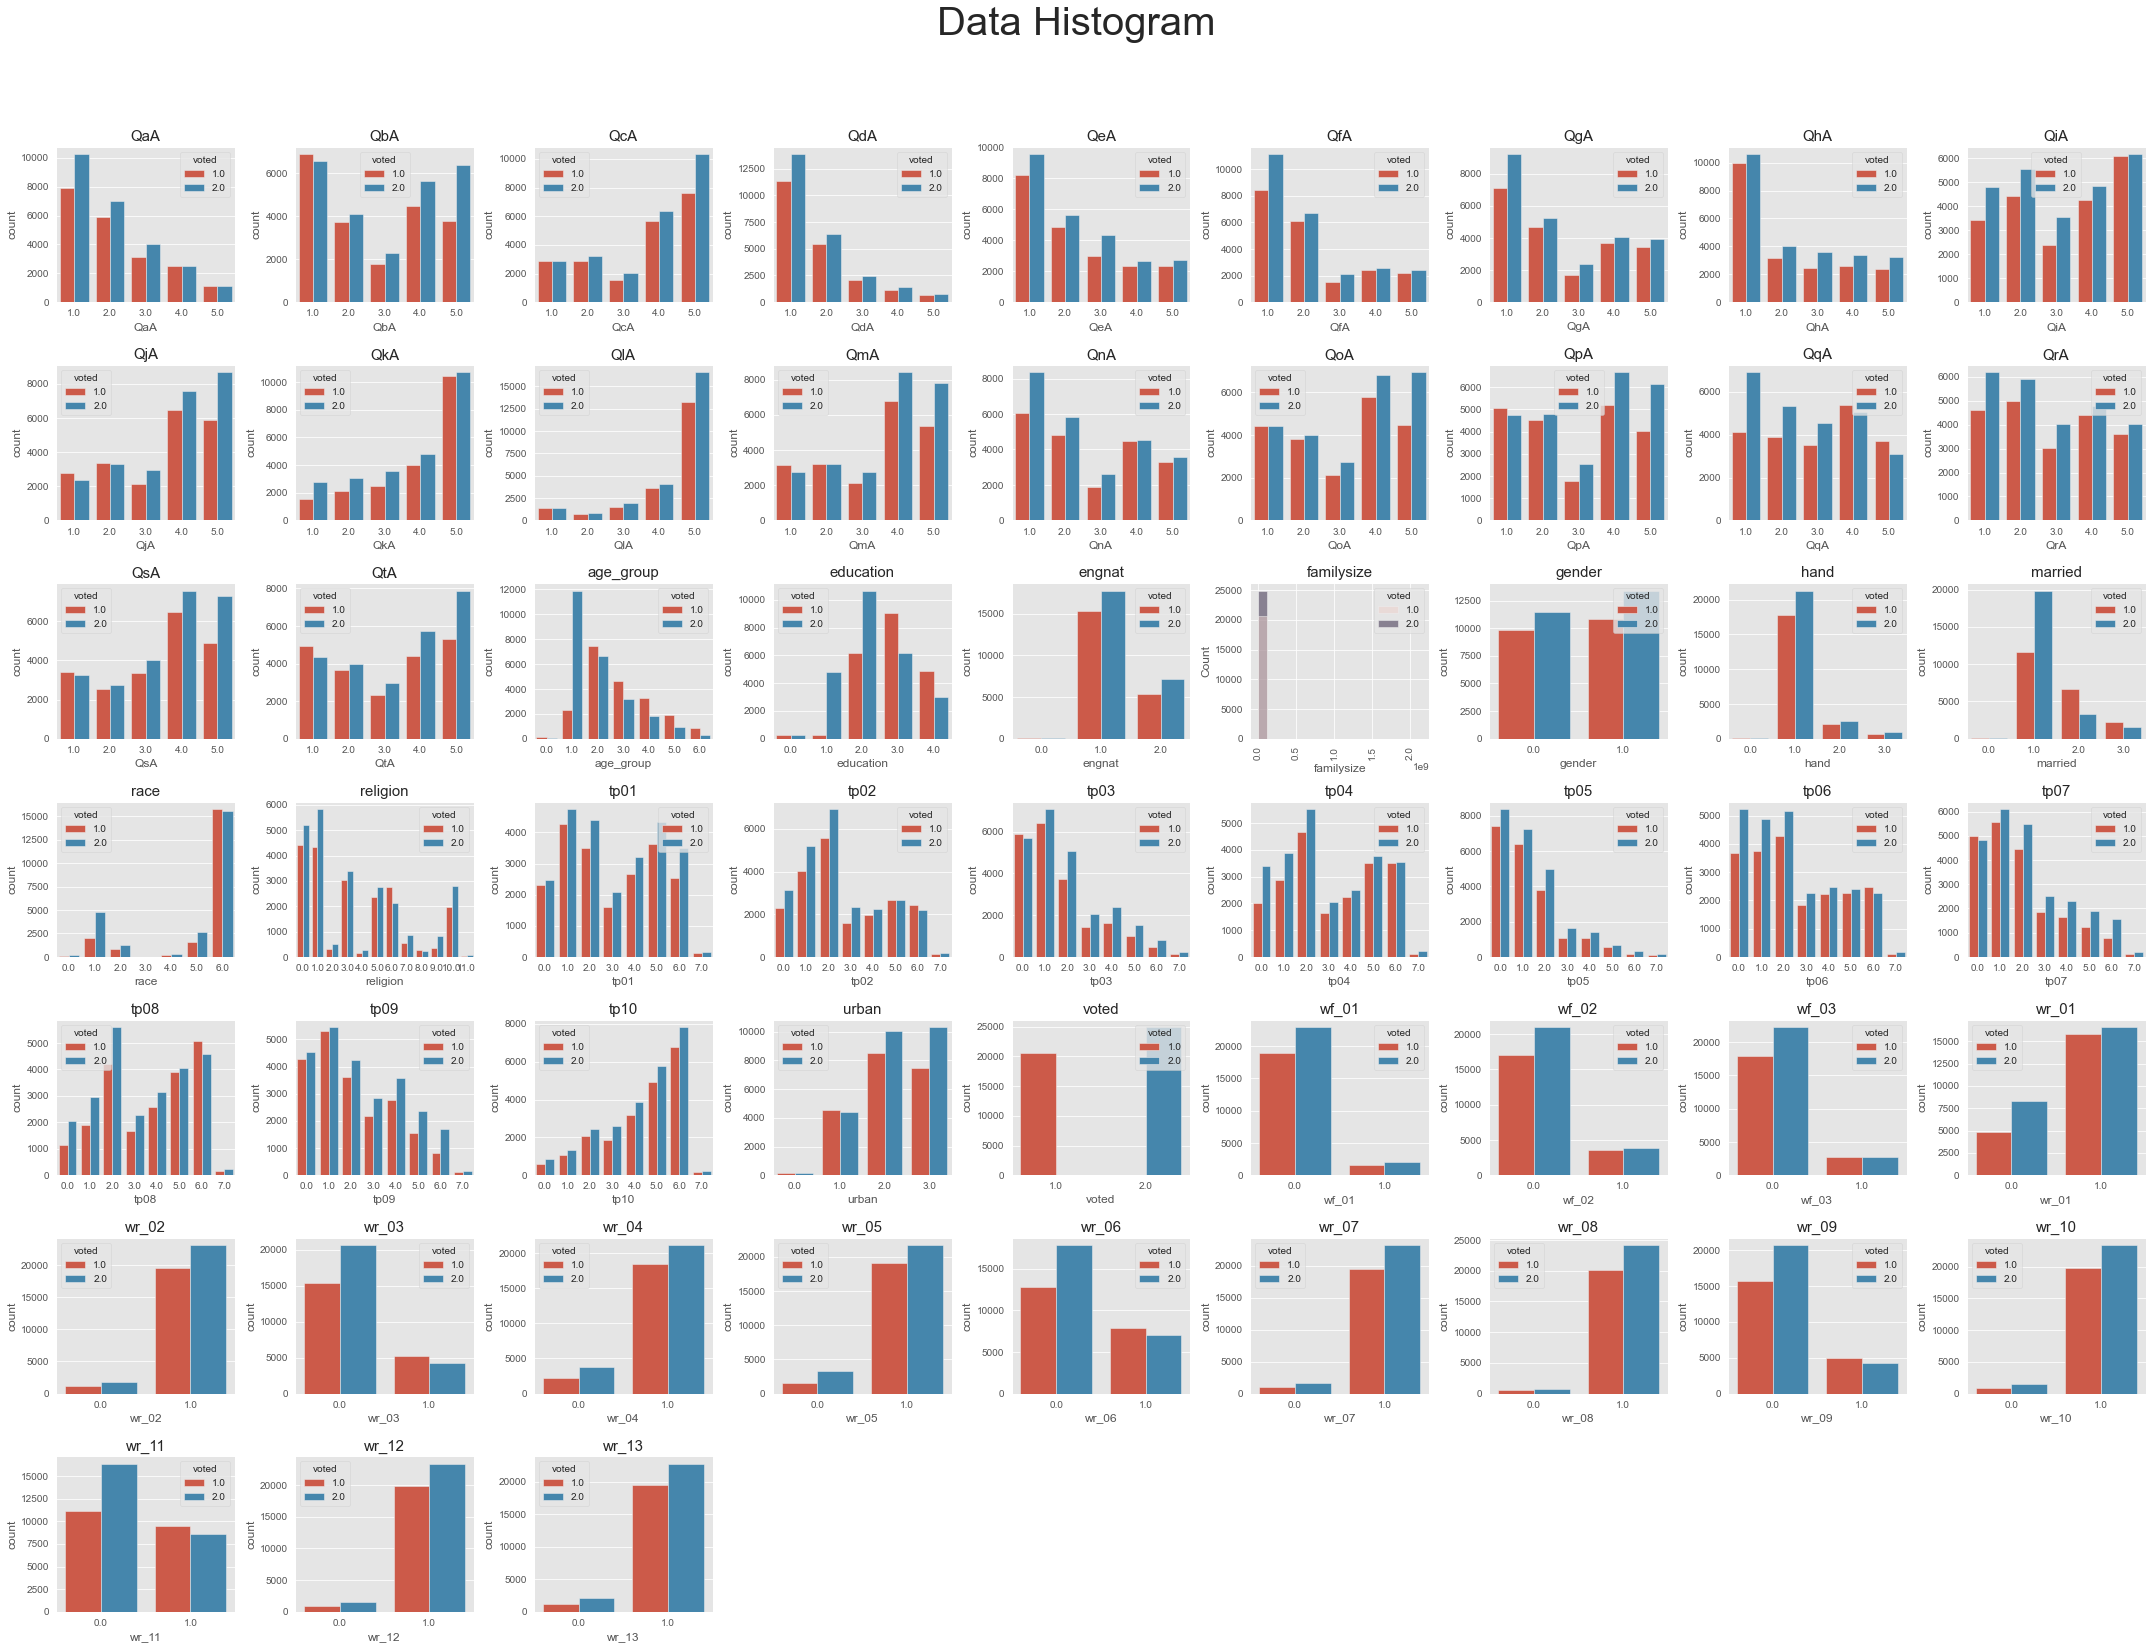

In [13]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(30, 30))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화
cols = train.columns
for i in range(len(cols)):
    plt.subplot(9, 9, i + 1)  # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.title(cols[i], fontsize=15)  # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(train[cols[i]].unique()) < 20:  # 해당 특징의 고유한 값 종류가 20개가 넘으면
        sns.countplot(data=train, x=train[cols[i]], hue='voted')  # 연령대별 target 분포
    else:
        plt.xticks(rotation=90)  # x축 text 회전
        sns.histplot(data=train, x=train[cols[i]], hue='voted', bins=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 모델 탐색

In [14]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [15]:
submission = pd.read_csv("data/sample_submission.csv")

In [16]:
train.nunique()

QaA            5
QbA            5
QcA            5
QdA            5
QeA            5
QfA            5
QgA            5
QhA            5
QiA            5
QjA            5
QkA            5
QlA            5
QmA            5
QnA            5
QoA            5
QpA            5
QqA            5
QrA            5
QsA            5
QtA            5
age_group      7
education      5
engnat         3
familysize    27
gender         2
hand           4
married        4
race           7
religion      12
tp01           8
tp02           8
tp03           8
tp04           8
tp05           8
tp06           8
tp07           8
tp08           8
tp09           8
tp10           8
urban          4
voted          2
wf_01          2
wf_02          2
wf_03          2
wr_01          2
wr_02          2
wr_03          2
wr_04          2
wr_05          2
wr_06          2
wr_07          2
wr_08          2
wr_09          2
wr_10          2
wr_11          2
wr_12          2
wr_13          2
dtype: int64

In [17]:
train.columns

Index(['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
       'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [18]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder

df = train.drop('voted', axis=1)

nunique = df.nunique()
cols = df.columns

cat_idxs = []
cat_dims = []

for i in range(len(cols)):
    if nunique[cols[i]] < 15:
        enc = LabelEncoder()
        train[cols[i]] = enc.fit_transform(train[cols[i]].values)
        test[cols[i]] = enc.transform(test[cols[i]].values)
        print(i)

        cat_idxs.append(i)
        cat_dims.append(len(enc.classes_))

len(cat_idxs), len(cat_dims)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


(55, 55)

In [19]:
from pytorch_tabnet.augmentations import ClassificationSMOTE
from cosine_annealing_warmup import CosineAnnealingWarmupRestarts

In [20]:
X_train = train.drop('voted', axis=1).values
y_train = train['voted'].values
X_test = test.values

In [21]:
def clf_kfold(train, TABNET_PARAMS):
    cv_accuracy = []
    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    for t, v in cv.split(train, train['voted']):
        model = TabNetClassifier(**TABNET_PARAMS)

        train_cv = train.iloc[t]  # 훈련용
        val_cv = train.iloc[v]  # 검증용 분리

        X_train = train_cv.drop('voted', axis=1).values
        y_train = train_cv['voted'].values

        X_val = val_cv.drop('voted', axis=1).values
        y_val = val_cv['voted'].values

        FIT_PARAMS = {
            'X_train': X_train,
            'y_train': y_train,
            'eval_set': [(X_val, y_val)],
            'eval_name': ['val'],
            'eval_metric': ['auc'],
            'max_epochs': T_EPOCHS,
            'patience': 300,
            'batch_size': 8192,
            'virtual_batch_size': 128,
            'weights': 1,
            'augmentations': aug
        }

        model.fit(**FIT_PARAMS)

        fpr, tpr, thresholds = metrics.roc_curve(y_val, model.predict_proba(X_val)[:, 1])

        score = metrics.auc(fpr, tpr)

        cv_accuracy.append(score)
    return np.mean(cv_accuracy)

In [22]:
T_EPOCHS = 1500

TABNET_PARAMS = {
    'n_d': 64,
    'n_a': 64,
    'n_independent': 1,
    'n_shared': 1,
    'n_steps': 5,
    'cat_idxs': cat_idxs,
    'cat_dims': cat_dims,
    'cat_emb_dim': len(cat_dims),
    'optimizer_fn': torch.optim.RAdam,
    'optimizer_params': {'lr': 0.01,
                         'weight_decay': 0.003
                         },
    'scheduler_fn': CosineAnnealingWarmupRestarts,
    'scheduler_params': {'first_cycle_steps': 200,
                         'cycle_mult': 2.0,
                         'max_lr': 0.01,
                         'min_lr': 0.0001,
                         'warmup_steps': 10,
                         'gamma': 0.5
                         },
    'mask_type': 'entmax',
    'gamma': 0.9,
    'lambda_sparse': 0.0001
}

aug = ClassificationSMOTE(p=0.2)
result = []

In [23]:
clf_kfold(train, TABNET_PARAMS)

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.51353 | val_auc: 0.50826 |  0:00:03s
epoch 1  | loss: 2.51753 | val_auc: 0.50281 |  0:00:04s
epoch 2  | loss: 2.5096  | val_auc: 0.50902 |  0:00:05s
epoch 3  | loss: 2.44928 | val_auc: 0.50804 |  0:00:06s
epoch 4  | loss: 2.37558 | val_auc: 0.50607 |  0:00:07s
epoch 5  | loss: 2.29595 | val_auc: 0.50559 |  0:00:09s
epoch 6  | loss: 2.1531  | val_auc: 0.50618 |  0:00:10s
epoch 7  | loss: 1.94126 | val_auc: 0.50115 |  0:00:11s
epoch 8  | loss: 1.73762 | val_auc: 0.49289 |  0:00:12s
epoch 9  | loss: 1.54334 | val_auc: 0.50048 |  0:00:13s
epoch 10 | loss: 1.39068 | val_auc: 0.5045  |  0:00:14s
epoch 11 | loss: 1.28837 | val_auc: 0.50266 |  0:00:16s
epoch 12 | loss: 1.22627 | val_auc: 0.51164 |  0:00:17s
epoch 13 | loss: 1.20402 | val_auc: 0.51375 |  0:00:18s
epoch 14 | loss: 1.19614 | val_auc: 0.51288 |  0:00:19s
epoch 15 | loss: 1.19787 | val_auc: 0.51133 |  0:00:20s
epoch 16 | loss: 1.18782 | val_auc: 0.51909 |  0:00:21s
epoch 17 | loss: 1.15359 | val_auc: 0.52029 |  0

KeyboardInterrupt: 

In [38]:
FIT_PARAMS = {
    'X_train': X_train,
    'y_train': y_train,
    'eval_set': [(X_train, y_train)],
    'eval_name': ['val'],
    'eval_metric': ['auc'],
    'max_epochs': T_EPOCHS,
    'patience': 300,
    'batch_size': 8192,
    'virtual_batch_size': 128,
    'weights': 1,
    'augmentations': aug
}

In [39]:
clf = TabNetClassifier(**TABNET_PARAMS)
clf.fit(**FIT_PARAMS)

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.44606 | val_auc: 0.48515 |  0:00:02s
epoch 1  | loss: 1.44552 | val_auc: 0.49133 |  0:00:02s
epoch 2  | loss: 1.47439 | val_auc: 0.49804 |  0:00:03s
epoch 3  | loss: 1.49707 | val_auc: 0.50083 |  0:00:03s
epoch 4  | loss: 1.4786  | val_auc: 0.50114 |  0:00:04s
epoch 5  | loss: 1.46085 | val_auc: 0.50256 |  0:00:05s
epoch 6  | loss: 1.45959 | val_auc: 0.5022  |  0:00:05s
epoch 7  | loss: 1.43914 | val_auc: 0.50707 |  0:00:06s
epoch 8  | loss: 1.42423 | val_auc: 0.49508 |  0:00:07s
epoch 9  | loss: 1.44224 | val_auc: 0.49714 |  0:00:07s
epoch 10 | loss: 1.43545 | val_auc: 0.49617 |  0:00:08s
epoch 11 | loss: 1.37424 | val_auc: 0.49603 |  0:00:08s
epoch 12 | loss: 1.36982 | val_auc: 0.49664 |  0:00:09s
epoch 13 | loss: 1.31758 | val_auc: 0.49507 |  0:00:10s
epoch 14 | loss: 1.36508 | val_auc: 0.49391 |  0:00:10s
epoch 15 | loss: 1.31512 | val_auc: 0.49595 |  0:00:11s
epoch 16 | loss: 1.28071 | val_auc: 0.49449 |  0:00:12s
epoch 17 | loss: 1.26743 | val_auc: 0.4976  |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [40]:
clf_pred = clf.predict_proba(X_test)[:, 1]

In [41]:
submission['voted'] = clf_pred
submission

,index,nerdiness
0,0,0.011738
1,1,0.977487
2,2,0.992542
3,3,0.777342
4,4,0.926520
...,...,...
35447,35447,0.969767
35448,35448,0.856550
35449,35449,0.996579
35450,35450,0.001321


In [42]:
submission.to_csv("result.csv", index=False)